# Personal Project: Sales Data

project title: **E-commerce Sales Analysis: Insights and Trends to Drive Business Decisions**

##### Sumaio Abdullah Rage

**objective:** 
 1. Analyze sales data to uncover trends and insights.
 2. Identify top-performing products, categories, and regions.
 3. Provide actionable recommendations to optimize revenue and customer satisfaction.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
#sales = pd.read_csv('/path/Portfolio projects/data/Sales_Data.csv')

In [6]:
sales = pd.read_csv(datapath / 'Sales_Data.csv')

## Data Source

In [7]:
sales.head()

,Unnamed: 0,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time of Day
0,0,295665,Laptops and Computers,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,1,295666,Home Appliances,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,2,295667,Charging Cables,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,3,295668,Monitors,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,4,295669,Charging Cables,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon


In [8]:
# Total number of rows in the DataFrame,length or number of observations in a DataFrame in pandas 
sales.shape[0]

185950

## Data Cleaning and Preprocessing

**Missing Values**

In [9]:
# Check missing values in the sales DataFrame
missing_values_sales = sales.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in the sales DataFrame:")
print(missing_values_sales)

Missing Values in the sales DataFrame:
Unnamed: 0          0
Order ID            0
Product Category    0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Time of Day         0
dtype: int64


**we can see that this dataset does not have any missing values.**

**remove the unnecessary column**

In [10]:
# Remove the unnecessary column 'Unnamed: 0' from the dataset
sales_data = sales.drop(columns=["Unnamed: 0"])

In [11]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product Category  185950 non-null  object 
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
 11  Time of Day       185950 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.0+ MB


**Duplicates**

In [12]:
# Check for duplicate rows in the cleaned dataset
duplicates_count = sales_data.duplicated().sum()

# Output the number of duplicate rows found
duplicates_count


264

**since this dataset contains 185,950 rows. I decided to remove those 264 duplicate rows.**

In [13]:
# Remove duplicate rows from the dataset
sales_data = sales_data.drop_duplicates()
sales_data.shape[0]


185686

**Covert the Order Date column datatype into datetime format**

In [14]:
# Convert 'Order Date' column to datetime format
sales_data['Order Date'] = pd.to_datetime(
    sales_data['Order Date'], format='%d-%m-%Y %H:%M', errors='coerce'
)


In [15]:
# Extract additional features from the 'Order Date' column
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Day of Week'] = sales_data['Order Date'].dt.day_name()
sales_data['Order Hour'] = sales_data['Order Date'].dt.hour


In [16]:
# Verify the extracted features
sales_data[['Order Date', 'Year', 'Day of Week', 'Order Hour']].head()

,Order Date,Year,Day of Week,Order Hour
0,2019-12-30 00:01:00,2019,Monday,0
1,2019-12-29 07:03:00,2019,Sunday,7
2,2019-12-12 18:21:00,2019,Thursday,18
3,2019-12-22 15:13:00,2019,Sunday,15
4,2019-12-18 12:38:00,2019,Wednesday,12


## Explotory Data Analysis (EDA)

1. Analyze sales trends over time (monthly, daily).

In [17]:
# Group sales data by Month and calculate total sales for each month
monthly_sales = sales_data.groupby('Month')['Sales'].sum()

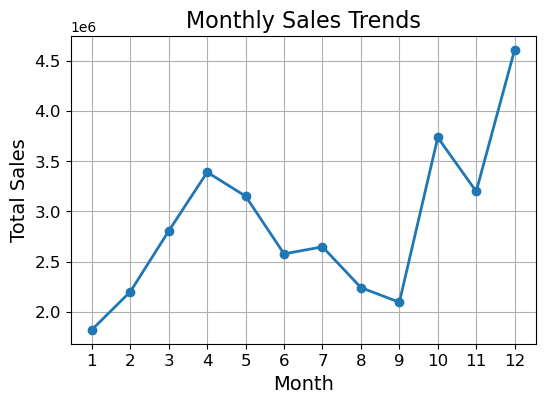

In [18]:
# Plotting monthly sales trends
plt.figure(figsize=(6, 4))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', linewidth=2)
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(monthly_sales.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [19]:
# Group sales data by Day of Week and calculate average sales for each day
daily_sales = sales_data.groupby('Day of Week')['Sales'].mean()
daily_sales = daily_sales.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])  # Ensuring day order

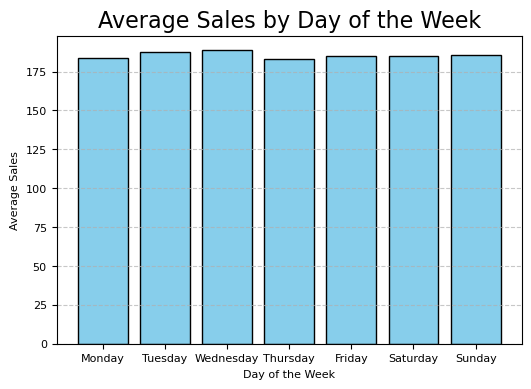

In [20]:
# Plotting daily sales trends
plt.figure(figsize=(6, 4))
plt.bar(daily_sales.index, daily_sales.values, color='skyblue', edgecolor='black')
plt.title('Average Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=8)
plt.ylabel('Average Sales', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Identify top products and categories by sales and quantity sold.

In [21]:
# Group sales data by Product and calculate total sales and quantity
product_sales = sales_data.groupby('Product').agg({'Sales': 'sum', 'Quantity Ordered': 'sum'})

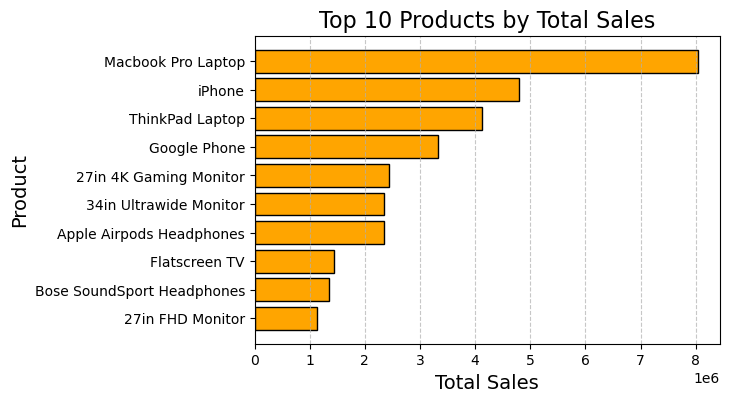

In [22]:
# Top products by sales
top_products_by_sales = product_sales.sort_values('Sales', ascending=False).head(10)
plt.figure(figsize=(6, 4))
plt.barh(top_products_by_sales.index[::-1], top_products_by_sales['Sales'][::-1], color='orange', edgecolor='black')
plt.title('Top 10 Products by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

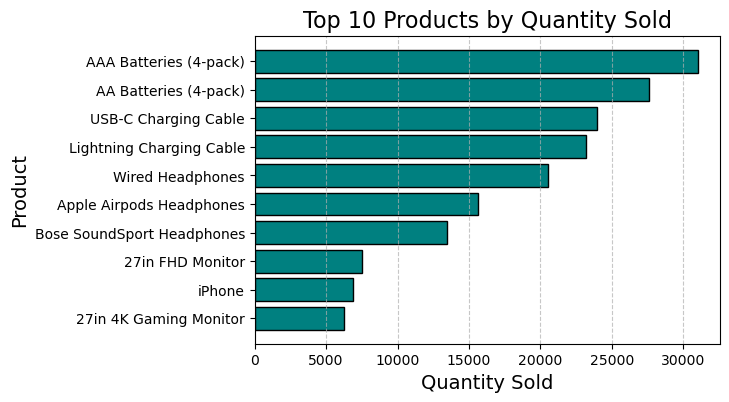

In [23]:
# Top products by quantity
top_products_by_quantity = product_sales.sort_values('Quantity Ordered', ascending=False).head(10)
plt.figure(figsize=(6, 4))
plt.barh(top_products_by_quantity.index[::-1], top_products_by_quantity['Quantity Ordered'][::-1], color='teal', edgecolor='black')
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

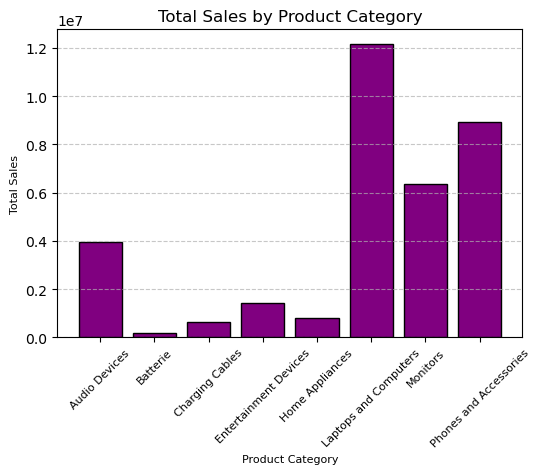

In [24]:
# Sales by category
category_sales = sales_data.groupby('Product Category').agg({'Sales': 'sum', 'Quantity Ordered': 'sum'})
plt.figure(figsize=(6, 4))
plt.bar(category_sales.index, category_sales['Sales'], color='purple', edgecolor='black')
plt.title('Total Sales by Product Category', fontsize=12)
plt.xlabel('Product Category', fontsize=8)
plt.ylabel('Total Sales', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3. Explore regional sales performance and customer purchasing patterns.

In [25]:
# Regional Sales Performance
regional_sales = sales_data.groupby('City').agg({'Sales': 'sum', 'Quantity Ordered': 'sum'})
top_cities_by_sales = regional_sales.sort_values(by='Sales', ascending=False).head(10)

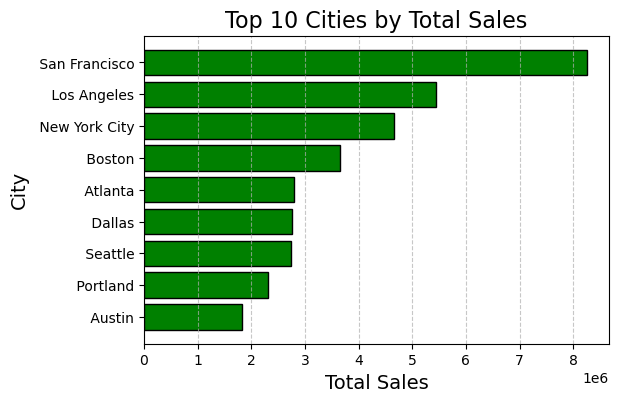

In [26]:
# Plotting top cities by total sales
plt.figure(figsize=(6, 4))
plt.barh(top_cities_by_sales.index[::-1], top_cities_by_sales['Sales'][::-1], color='green', edgecolor='black')
plt.title('Top 10 Cities by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [27]:
# Sales by Time of Day
time_of_day_sales = sales_data.groupby('Time of Day')['Sales'].sum()

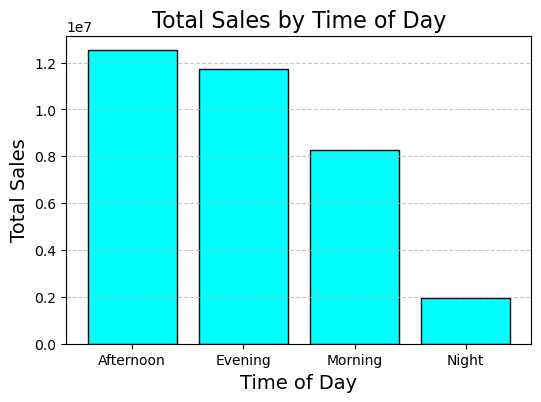

In [28]:
# Plotting sales by time of day
plt.figure(figsize=(6, 4))
plt.bar(time_of_day_sales.index, time_of_day_sales.values, color='cyan', edgecolor='black')
plt.title('Total Sales by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. Explore regional sales performance and customer purchasing patterns.

In [29]:
# Regional Sales Performance
regional_sales = sales_data.groupby('City').agg({'Sales': 'sum', 'Quantity Ordered': 'sum'})
top_cities_by_sales = regional_sales.sort_values(by='Sales', ascending=False).head(10)

In [30]:
# Customer Purchasing Patterns: Sales by Hour
hourly_sales = sales_data.groupby('Order Hour')['Sales'].sum()

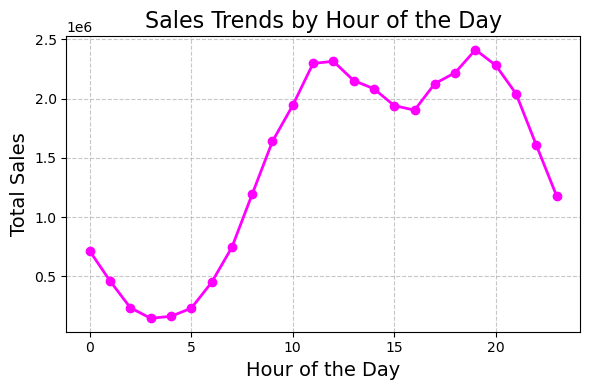

In [31]:
# Plotting sales by hour
plt.figure(figsize=(6, 4))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', color='magenta', linewidth=2)
plt.title('Sales Trends by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
# Save the cleaned dataset for Tableau
sales_data.to_csv('Cleaned_Sales_Data.csv', index=False)